<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_03/blob/main/DS_HW_03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Домашнє завдання 03**

1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді;


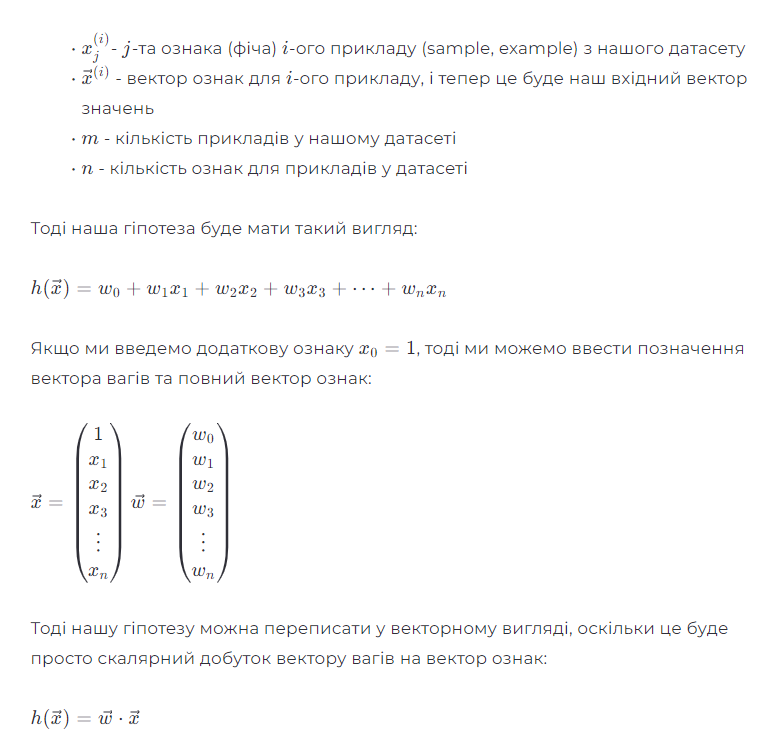

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

data = {"price": [1000, 2000, 3000, 4000], "area": [20, 30, 40, 50], "bathrooms": [1, 2, 3, 4] }
df = pd.DataFrame(data)

df["ones"] = 1
X = df[["ones", "area", "bathrooms"]].values

Y = df[["price"]].values

w_0 = 1.
w_1 = 1.
w_2 = 1
W = np.array([w_0, w_1, w_2]).reshape(-1, 1)

learning_rate = 0.01

In [ ]:
X

array([[ 1, 20,  1],
       [ 1, 30,  2],
       [ 1, 40,  3],
       [ 1, 50,  4]])

In [ ]:
W

array([[1.],
       [1.],
       [1.]])

In [ ]:
def hyp(W, X):
    H = np.dot(X, W).reshape(-1, 1)
    return H

In [ ]:
H = hyp(W, X)

In [ ]:
H

array([[22.],
       [33.],
       [44.],
       [55.]])

In [ ]:
W

array([[1.],
       [1.],
       [1.]])

In [ ]:
X

array([[ 1, 20,  1],
       [ 1, 30,  2],
       [ 1, 40,  3],
       [ 1, 50,  4]])

2. Cтворіть функцію для обчислення функції втрат у векторному вигляді;

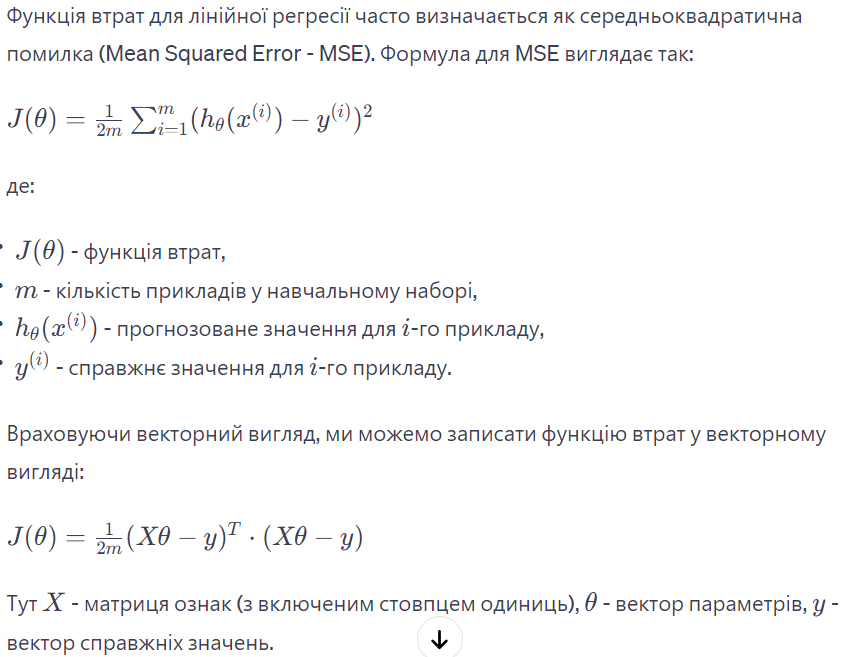

In [ ]:
# def loss_function(X, Y, W):
#     """
#     Розрахунок функції втрат для лінійної регресії у векторному вигляді.

#     Параметри:
#     X (numpy.ndarray): Матриця ознак (включаючи стовпець одиниць).
#     y (numpy.ndarray): Вектор справжніх значень.
#     theta (numpy.ndarray): Вектор параметрів моделі.

#     Повертає:
#     float: Значення функції втрат.
#     """

#     m = len(Y)
#     H = hyp(W, X)
#     J = (1 / (2 * m)) * np.sum(np.square(H - Y))
#     return J

# cost = loss_function(X, Y, W)
# print(cost)

def loss_function(X, Y, W):
    """
    Розрахунок функції втрат для лінійної регресії у векторному вигляді.

    Параметри:
    X (numpy.ndarray): Матриця ознак (включаючи стовпець одиниць).
    Y (numpy.ndarray): Вектор справжніх значень.
    W (numpy.ndarray): Вектор параметрів моделі.

    Повертає:
    float: Значення функції втрат.
    """
    m = len(Y)
    H = hyp(W, X)
    J = (1 / (2 * m)) * np.dot((H - Y).T, (H - Y))
    return J[0][0]

cost = loss_function(X, Y, W)
print(cost)

3650675.0


3. Реалізуйте один крок градієнтного спуску;

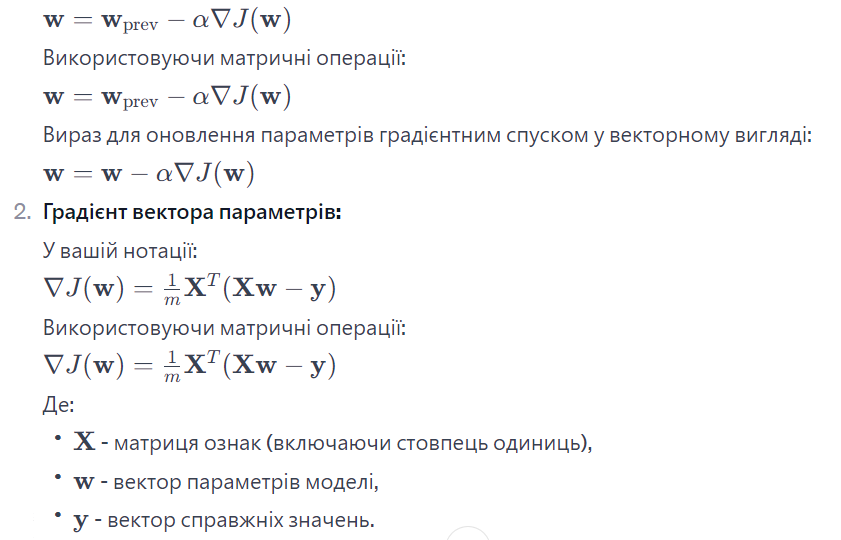

In [ ]:
####
def h(w_0, w_1, x):
  return w_0 + w_1 * x

data = {"price": [1000, 2000, 3000, 4000], "area": [20, 30, 40, 50]}
df = pd.DataFrame(data)

df["ones"] = 1
X = df[["ones", "area"]].values

Y = df[["price"]].values

w_0 = 0.
w_1 = 1.
W = np.array([w_0, w_1]).reshape(-1, 1)

learning_rate = 0.01
####

# def grad_step(W, grads, learning_rate = 0.001): # learning rate it is alpha (step)
#   w_0, w_1 = W
#   grad_w_0, grad_w_1 = grads

#   w_0 -= learning_rate * grad_w_0 # gradient
#   w_1 -= learning_rate * grad_w_1
#   W = np.array([w_0, w_1])
#   return W


# def grad_w_0(W, X, Y, df):

#   n = df.area.shape[0]
#   H = hyp(W, X)
#   cost = np.sum(H.reshape(-1, 1) - Y)
#   return cost/(n)


# def grad_w_1(W, Y, X, df): # для нахилу

#   n = df.area.shape[0]
#   H = hyp(W, X)
#   X_1 = df[["area"]].values
#   cost = np.sum((H.reshape(-1, 1) - Y) * X_1)
#   return cost/n


# def grad_descent(weights, df, num_iter, learning_rate = 0.001, epsilon = 1e-10): # epsolon - stop for calculations

#   w_0, w_1 = weights
#   loss = loss_func(w_0, w_1, df)
#   loss_history = [loss]

#   for i in range(num_iter): # number of iterations

#     d_w_0 = grad_w_0(w_0, w_1, df)
#     d_w_1 = grad_w_1(w_0, w_1, df)
#     grads = (d_w_0, d_w_1)

#     w_0, w_1 = grad_step(weights, grads, learning_rate = learning_rate)
#     weights = (w_0, w_1)
#     loss = loss_func(w_0, w_1, df)

#     if abs(loss - loss_history[-1]) < epsilon:
#       loss_history.append(loss)
#       break

#     loss_history.append(loss)

#   return weights, loss_history


def gradient_descent_step(X, Y, W, learning_rate):
    m = len(Y)
    H = hyp(W, X)

    gradient = np.dot(X.T, (H - Y)) / m
    print(f"gradient: {gradient}")
    W = W - learning_rate * gradient
    return W

# Один крок градієнтного спуску
W = gradient_descent_step(X, Y, W, learning_rate)

[[20.]
 [30.]
 [40.]
 [50.]]
[[ -2465.]
 [-98650.]]
[[0.]
 [1.]]


In [ ]:
W

array([[ 24.65],
       [987.5 ]])

4. знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_data/Housing.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
